<a href="https://colab.research.google.com/github/E1E122121Muhammadrafiqalmaruf/121_Rafiq/blob/main/Rafiq_121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
cancer = pd.read_csv('/content/kidney_disease.csv')

In [72]:
cancer.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [73]:
cancer.drop(['id', 'sg', 'al', 'su', 'rbc', 'pc', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc',], axis=1, inplace=True)

cancer.head()

,age,bp,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,7.0,50.0,notpresent,notpresent,no,no,no,good,no,no,ckd
2,62.0,80.0,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,notpresent,notpresent,no,no,no,good,no,no,ckd


In [74]:
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan Label Encoding untuk setiap kolom yang bertipe objek (string)
for column in cancer.columns:
    if cancer[column].dtype == 'object':
        cancer[column] = label_encoder.fit_transform(cancer[column])

# Menampilkan data setelah Label Encoding
print(cancer)


      age    bp  pcc  ba  htn  dm  cad  appet  pe  ane  classification
0    48.0  80.0    0   0    1   4    1      0   0    0               0
1     7.0  50.0    0   0    0   3    1      0   0    0               0
2    62.0  80.0    0   0    0   4    1      1   0    1               0
3    48.0  70.0    1   0    1   3    1      1   1    1               0
4    51.0  80.0    0   0    0   3    1      0   0    0               0
..    ...   ...  ...  ..  ...  ..  ...    ...  ..  ...             ...
395  55.0  80.0    0   0    0   3    1      0   0    0               2
396  42.0  70.0    0   0    0   3    1      0   0    0               2
397  12.0  80.0    0   0    0   3    1      0   0    0               2
398  17.0  60.0    0   0    0   3    1      0   0    0               2
399  58.0  80.0    0   0    0   3    1      0   0    0               2

[400 rows x 11 columns]


In [75]:
cancer.head()

,age,bp,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,0,0,1,4,1,0,0,0,0
1,7.0,50.0,0,0,0,3,1,0,0,0,0
2,62.0,80.0,0,0,0,4,1,1,0,1,0
3,48.0,70.0,1,0,1,3,1,1,1,1,0
4,51.0,80.0,0,0,0,3,1,0,0,0,0


In [77]:
cancer.drop(['age', 'bp'], axis=1, inplace=True)

cancer.head()

,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,0,0,1,4,1,0,0,0,0
1,0,0,0,3,1,0,0,0,0
2,0,0,0,4,1,1,0,1,0
3,1,0,1,3,1,1,1,1,0
4,0,0,0,3,1,0,0,0,0


In [79]:
print(cancer.columns)


Index(['pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')


In [80]:
#memisakhan atribut dengan label dimana x itu atribut dan y itu label
X = cancer[['pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']]
y = cancer['classification']


#membagi dataset menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=123)

In [82]:
from sklearn.tree import DecisionTreeClassifier

#menentukan  model decision tree
tree_model= DecisionTreeClassifier()

#melatih model menggunakan data latih dengan fungsi fit
tree_model= tree_model.fit(X_train,y_train)

In [83]:
#evaluasi model untuk meguji seberapa baik model yang digunakan dan akurasi

from sklearn.metrics import accuracy_score

y_pred =  tree_model.predict(X_test)

accuracy_score =round(accuracy_score(y_pred, y_test), 3)

print('Accuracy: ',accuracy_score)

Accuracy:  0.888


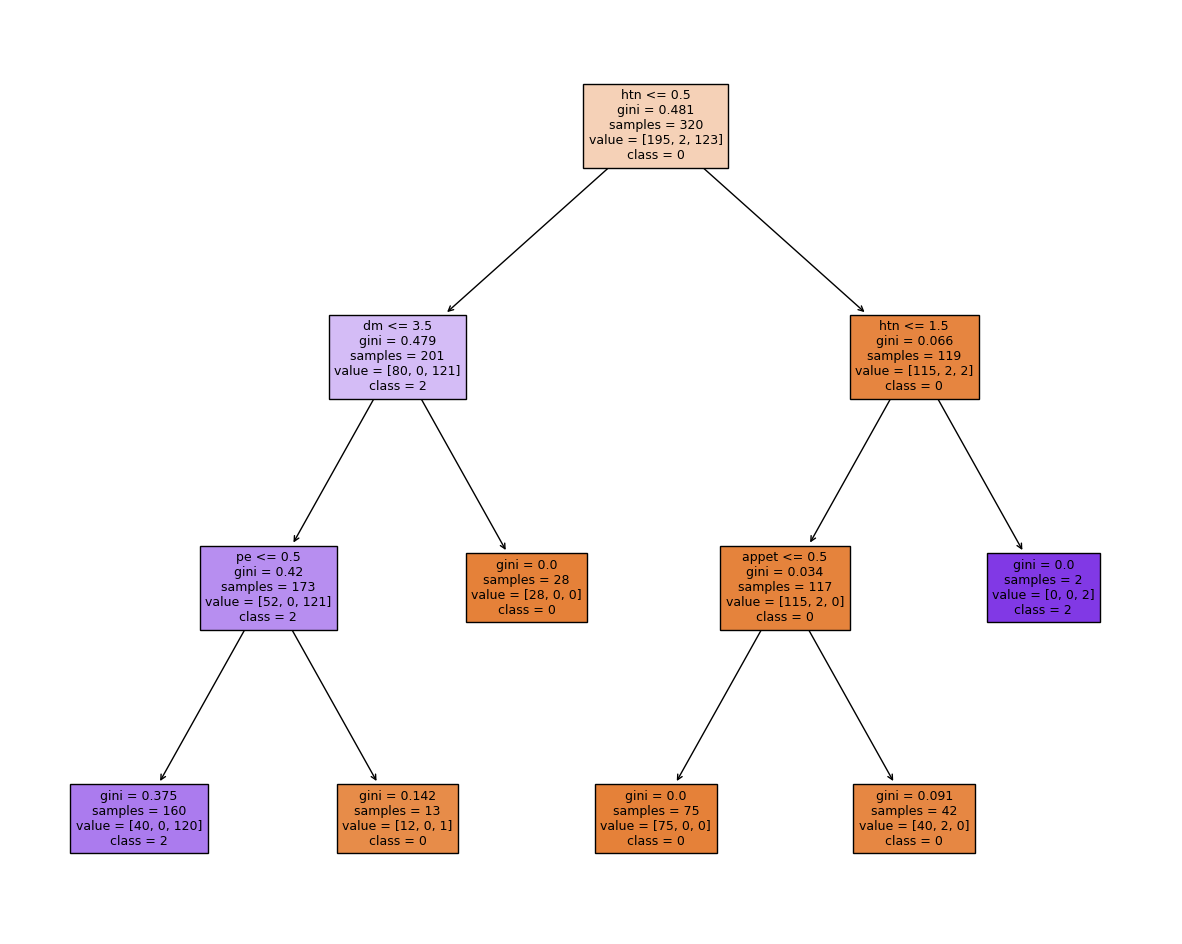

In [85]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np

# Membuat model dengan membatasi kedalaman pohon
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(X_train, y_train)

# Mendapatkan nilai unik dari kelas dalam data pelatihan
unique_classes = np.unique(y_train)

# Menyimpan nama kelas dalam variabel class_names
class_names = [str(c) for c in unique_classes]

# Visualisasi pohon keputusan
plt.figure(figsize=(15, 12))
plot_tree(tree_model, feature_names=X.columns, class_names=class_names, filled=True, fontsize=9)
plt.show()
